# Lesson 9 - Naive Bayes (& Milestone 3)
## lesson 9 appended below milestone 3

## Author - Nourhan El Zarif

# Preparing the Data

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [2]:
# Location of dataset
file = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
kc_house= pd.read_csv(file)
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Cleaning
I will select some features for principal component analysis. These features are selected based on the data exploration from previous milestones.

In [3]:
#selecting a few features 
feature_labels = kc_house[['condition', 'waterfront', 'yr_built', 'sqft_living', 'bedrooms']]
target_label = 'price'

In [4]:
#checking for NaNs
feature_labels.isnull().any()

condition      False
waterfront     False
yr_built       False
sqft_living    False
bedrooms       False
dtype: bool

The columns we're interested in do not have null values.

In [5]:
y = kc_house[target_label]
X = feature_labels.as_matrix()

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
X

array([[   3,    0, 1955, 1180,    3],
       [   3,    0, 1951, 2570,    3],
       [   3,    0, 1933,  770,    2],
       ...,
       [   3,    0, 2009, 1020,    2],
       [   3,    0, 2004, 1600,    3],
       [   3,    0, 2008, 1020,    2]], dtype=int64)

## Scaling
The features must be scaled first for PCA.

In [7]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [8]:
# Scale all columns first
# Create x-scaled .
x_scaled = np.apply_along_axis(scale, 0, X)
# Create a scaled y-target.
y_scaled = scale(y)

# Generate Working Model: PCR

## Principcal Component Analysis (PCA)

In [9]:
pca = PCA()
pca_result = pca.fit_transform(x_scaled)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

Text(0, 0.5, 'Explained Variance')

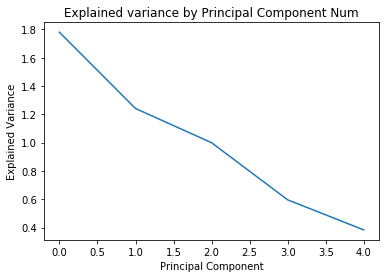

In [10]:
plt.plot(pca.explained_variance_)
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

The plot above shows the explained variance of the principcal components 0 to 4. For every additional component, it accounts for less explained variance. But, we can see that the line is not very steep.

The array below shows the exact explained variance for every component. The highest accounts for 1.8, and the lowest for 0.4. I will include all 5 compoents for PCR because the difference isn't very significant.

In [11]:
print(pca.explained_variance_)

[1.77950451 1.24117801 0.99941973 0.59621148 0.38391762]


## PCR

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     5752.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:04:13   Log-Likelihood:                -21522.
No. Observations:               21613   AIC:                         4.306e+04
Df Residuals:                   21607   BIC:                         4.310e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.123e-17      0.004  -7.01e-15      1.0

Text(0.5, 1.0, 'Residual Histogram')

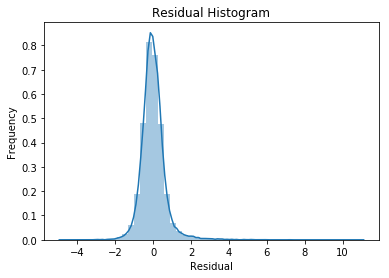

In [12]:
# Perform linear regression with the first N columns.
n = 5
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

# Conclusion

The adjusted R-squared value is 0.571. This means that the model does not fit the data very well. The partial intercepts have low p-values and the confidence intervals do not straddle 0. A linear regression model is not very good for this data.

# Lesson 9 - Naive Bayes

## Prepparing For Naive Bayes

In [13]:
bayes_df = kc_house.copy()
bayes_df.shape

(21613, 21)

In [14]:
bayes_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Some redundent columns will be dropped to eliminate a possbility of having collinear columns. Irrelevant columns will also be dropped.

In [15]:
bayes_df = bayes_df.drop(['id', 'date','sqft_lot', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15'], axis = 1)
bayes_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront',
       'condition', 'yr_built', 'zipcode'],
      dtype='object')

I will make my price classifier be if the property value is at least a  million dollars.

In [16]:
bayes_df.loc[:,'price'] = bayes_df.loc[:,'price'] >= 1000000

In [17]:
bayes_df['price'].value_counts()

False    20121
True      1492
Name: price, dtype: int64

In [18]:
bayes_df.dtypes

price             bool
bedrooms         int64
bathrooms      float64
sqft_living      int64
waterfront       int64
condition        int64
yr_built         int64
zipcode          int64
dtype: object

In [20]:
bayes_df['price'] = bayes_df['price'].astype('category')
price = bayes_df['price'].cat.codes
#price

In [21]:
features = []

for c in bayes_df.columns:
    if c != 'price':
        features.append(bayes_df[c])
        
features = np.array(features).T

In [22]:
features.shape

(21613, 7)

## Creating the model

In [23]:
import sklearn.naive_bayes
model = sklearn.naive_bayes.MultinomialNB(alpha=3)
model.fit(features, price)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True)

In [25]:
conditional_probas = pd.DataFrame(model.feature_log_prob_, columns=bayes_df.columns[1:])
conditional_probas

,bedrooms,bathrooms,sqft_living,waterfront,condition,yr_built,zipcode
0,-10.332966,-10.820964,-3.955308,-17.331490,-10.307775,-3.946670,-0.039321
1,-10.148304,-10.401145,-3.312989,-14.176297,-10.303169,-3.962583,-0.057126


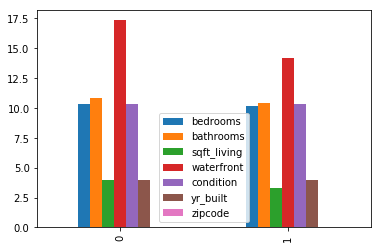

In [26]:
(-conditional_probas).plot(kind='bar')

In [27]:
predicted_price = model.predict(features)
price_probabilities = model.predict_proba(features)

accuracy = sklearn.metrics.accuracy_score(price, predicted_price)
precision = sklearn.metrics.precision_score(price, predicted_price)
recall = sklearn.metrics.recall_score(price, predicted_price)
print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
print('Confusion matrix:')

def confusion_matrix(labels, predicted_labels, label_classes):
    return pd.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes) 

confusion_matrix(price, predicted_price, 
                 bayes_df['price'].cat.categories)

Accuracy = 0.853, Precision = 0.297, Recall = 0.826
Confusion matrix:


,False,True
False,17203,2918
True,259,1233


The models accuracy is 0.853. Overall, the model predicts correctly.

The model's recall is 0.826. Of the 1,492 properties priced at a million dollars or more, the model correctly predicted 1233. This means it did a good job of detecting the houses priced at over a million.

The model is not very precise. It wrongly predicted 2918 properties are priced over a million dollars. This lowered the precision to 0.297. This means that the model has a tendency of over estimating the number of properties priced at over a million.


### Which model is better?
The principal component regression used was linear regression. The adjusted r-squarred value was 0.57. That means that the model is equally as good or slightly better than a coin toss. 

The naive bayes model has a decent accuracy of 0.853. The pitfall is that it predicts whether the value of a house is over or under a million. That is not very useful when the aim is appraising a peoperty. 